### Plotting the anomaly of the latest years to the time before

In [1]:
# Robbie's plotting function for confirming results

import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

def cartoplot(lon,
              lat,
              data,
              bounding_lat=60,
              land=True,
              ocean=False,
              gridlines=True,
              figsize=[16,8],
              save_dir=None,
              show=True,
              color_scale=(None,None),
              color_scheme='plasma',
              hemisphere='n'):
    
    """
    Plots a north polar plot using cartopy. \
    Must be supplied with gridded arrays of lon, lat and data
    """

    # Make plot

    fig = plt.figure(figsize=figsize)    
    
    if hemisphere == 's':
        bounding_lat = -abs(bounding_lat)
        pole = -90
        ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))

    elif hemisphere == 'n':
        pole = 90
        ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))

    else:
        raise

        
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    
    
    if ocean == True:
        ax.add_feature(cartopy.feature.OCEAN,zorder=2)
    if land == True:
        ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    ax.set_extent([-180, 180, pole, bounding_lat], ccrs.PlateCarree())
    
    if gridlines == True:
        ax.gridlines()
        
    vmin, vmax = color_scale[0], color_scale[1]

    plt.pcolormesh(np.array(lon), np.array(lat), np.array(data), vmin = vmin, vmax = vmax,
                 transform=ccrs.PlateCarree(),zorder=0,cmap=color_scheme)
    
    plt.colorbar()
    
    if save_dir != None:
        plt.savefig(save_dir)
        
    if show == True:
        plt.show()

In [2]:
import glob
import xarray as xr

files = sorted(glob.glob('/Users/farrerowsleybrown/Desktop/project/code/data/my_data/ice_abs_mo/*.nc'))

ds = xr.open_mfdataset(files, concat_dim='year', combine='nested').load()

melt = ds.net / (334000*917)

In [3]:

melt = melt.where(melt != 0)
anom = melt[30:].mean(dim='year') - melt[:30].mean(dim='year')

anom = anom.fillna(0)
anom = anom.where(ds.latitude.load() < 86.9)


/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
long = ds.long / (334000*917)
long = long.where(long!=0)
long_anom = long[30:].mean(dim='year') - long[:30].mean(dim='year')
long_anom = long_anom.fillna(0)
long_anom = long_anom.where(ds.latitude.load()<86.9)

/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
short = ds.short / (334000*917)
short = short.where(short!=0)
short_anom = short[30:].mean(dim='year') - short[:30].mean(dim='year')
short_anom = short_anom.fillna(0)
short_anom = short_anom.where(ds.latitude.load()<86.9)

/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


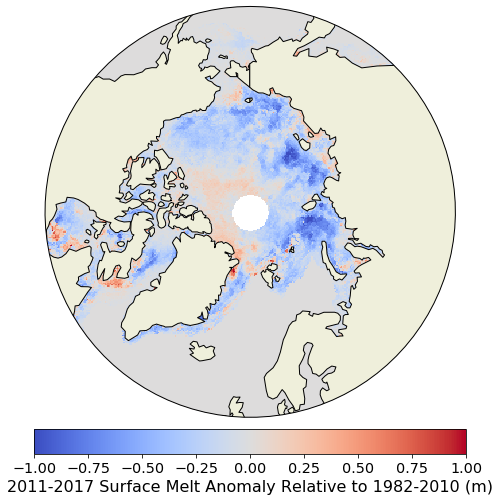

In [7]:
fig = plt.figure(figsize=(6,7), constrained_layout=True)

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.set_extent([-180, 180, 90, 55], ccrs.PlateCarree())

cp = ax.pcolormesh(ds.longitude.data, ds.latitude.data,
               anom,
               vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree(),
               zorder=0,
               cmap='coolwarm')

cbar_ax = fig.add_axes([0, 0.02, 1, 0.05])
cbar = fig.colorbar(cp, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize='x-large')
cbar.set_label(r'2011-2017 Surface Melt Anomaly Relative to 1982-2010 (m)', fontsize=16) 

plt.tight_layout()

#plt.savefig('/Users/farrerowsleybrown/Desktop/2011-2017_shortanom_melt.png', dpi=300, bbox_inches='tight')

plt.show()

In [38]:
melt = melt.where(melt!=0).where(ds.latitude>80).where(ds.latitude<86.9)

tot = np.array([])
years = range(1988,2018)

for i in range(6,36):
    tot = np.append(tot,
                   np.nanmean(melt[i]))

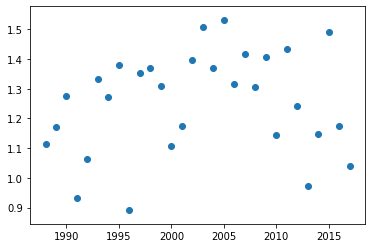

In [46]:
plt.figure()

plt.scatter(years, tot)


#plt.savefig('/Users/farrerowsleybrown/Desktop/smelty.png',dpi=300)
plt.show()

In [44]:
import scipy.stats

scipy.stats.pearsonr(years, tot)

(0.1533121249913441, 0.4186058528234597)